In [1]:
import pydot

pydot.__version__

'1.4.1'

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input1 (InputLayer)            [(None, 10, 28)]     0           []                               
                                                                                                  
 Input2 (InputLayer)            [(None, 10, 28)]     0           []                               
                                                                                                  
 Hidden1-1-1 (Dense)            (None, 10, 100)      2900        ['Input1[0][0]']                 
                                                                                                  
 Input3 (InputLayer)            [(None, 10, 28)]     0           []                               
                                                                                            

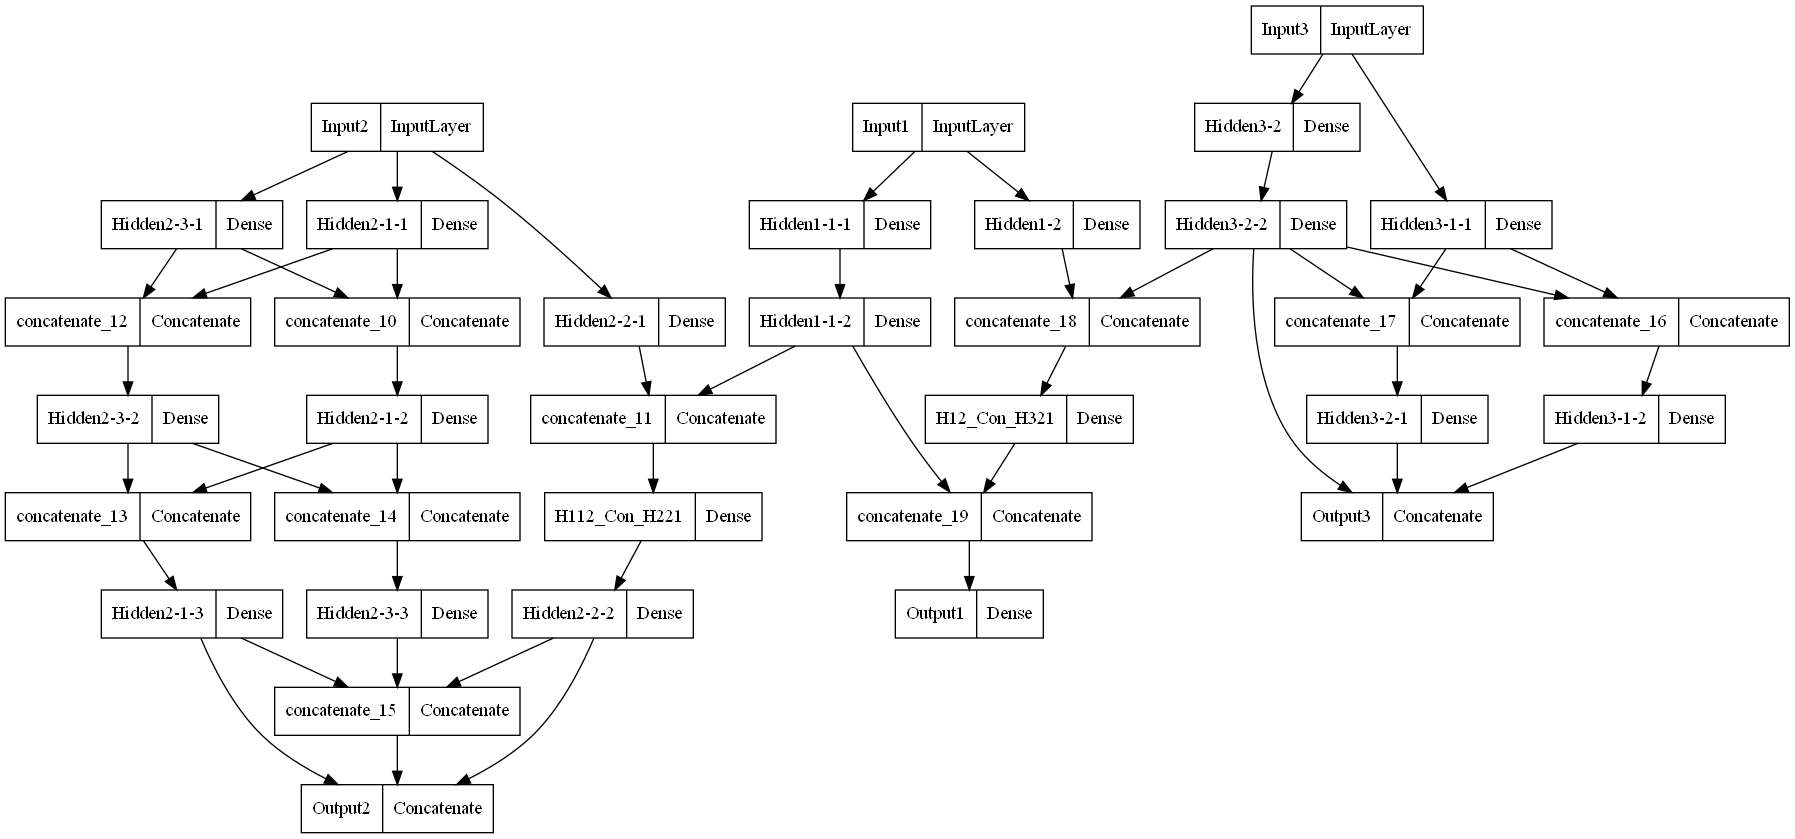

In [3]:
from keras.layers import Dense, Input, Flatten
from keras.models import Sequential, Model
from keras.layers import Concatenate
import tensorflow as tf

tf.config.experimental.list_physical_devices('GPU')

# input
Input_Layer1 = Input(shape=(10, 28), name="Input1")
Input_Layer2 = Input(shape=(10, 28), name="Input2")
Input_Layer3 = Input(shape=(10, 28), name="Input3")
Input_Layer_List = [Input_Layer1, Input_Layer2, Input_Layer3]

# Hidden 1
#   Hidden1-1
Hidden1_1_1 = Dense(100, activation="relu", name='Hidden1-1-1')(Input_Layer1)
Hidden1_1_2 = Dense(100, activation="relu", name='Hidden1-1-2')(Hidden1_1_1)
#   Hidden1-2
Hidden1_2 = Dense(50, activation="relu", name='Hidden1-2')(Input_Layer1)
# Hidden 1 Out
Hidden1_Out = [Hidden1_1_2, Hidden1_2]

# Hidden 2
#   Hidden2-1
Hidden2_1_1 = Dense(50, activation="relu", name='Hidden2-1-1')(Input_Layer2)
#   Hidden2-2
Hidden2_2_1 = Dense(100, activation="relu", name='Hidden2-2-1')(Input_Layer2)
#   Hidden2-3
Hidden2_3_1 = Dense(50, activation="relu", name='Hidden2-3-1')(Input_Layer2)

# #   Con Hidden2-1-1, Hidden2-3-1
# H211_Con_H231 = Concatenate(name="H211_Con_H231")([Hidden2_1_1, Hidden2_3_1])
#   Hidden2-1-2
Hidden2_1_2 = Dense(45, activation="relu", name='Hidden2-1-2')(
    Concatenate()([Hidden2_1_1, Hidden2_3_1]))
#   Hidden2-2-2
#     Con Hidden1-1-2, Hidden2-2-1
H112_Con_H221 = Concatenate()([Hidden1_1_2, Hidden2_2_1])
H112_Con_H221 = Dense(1, activation='sigmoid', name='H112_Con_H221')(H112_Con_H221)
Hidden2_2_2 = Dense(50, activation="relu", name='Hidden2-2-2')(H112_Con_H221)
#   Hidden2-3-2
Hidden2_3_2 = Dense(50, activation="relu", name='Hidden2-3-2')(
    Concatenate()([Hidden2_1_1, Hidden2_3_1]))

#   Hidden2-1-3
Hidden2_1_3 = Dense(30, activation="relu", name='Hidden2-1-3')(
    Concatenate()([Hidden2_1_2, Hidden2_3_2]))
#   Hidden2-3-3
Hidden2_3_3 = Dense(50, activation="relu", name='Hidden2-3-3')(
    Concatenate()([Hidden2_1_2, Hidden2_3_2]))
# Hidden 2-2 Con 2-3
Hidden2_2_Con = Concatenate()([Hidden2_1_3, Hidden2_2_2, Hidden2_3_3])
# Hidden 2 Out
Hidden2_Out = [Hidden2_1_3, Hidden2_2_Con, Hidden2_2_2]


# Hidden 3
#   Hidden3-1-1
Hidden3_1_1 = Dense(50, activation="relu", name='Hidden3-1-1')(Input_Layer3)
#   Hidden3-2
Hidden3_2 = Dense(50, activation="relu", name='Hidden3-2')(Input_Layer3)
#     Hidden2-2-2
Hidden3_2_2 = Dense(50, activation="relu", name='Hidden3-2-2')(Hidden3_2)

#   Hidden3-1-2
Hidden3_1_2 = Dense(50, activation="relu", name='Hidden3-1-2')(
    Concatenate()([Hidden3_1_1,Hidden3_2_2]))
#     Hidden3-2-1
Hidden3_2_1 = Dense(50, activation="relu", name='Hidden3-2-1')(
    Concatenate()([Hidden3_1_1,Hidden3_2_2]))
# Hidden 3 Out
Hidden3_Out = [Hidden3_1_2, Hidden3_2_2 ,Hidden3_2_1]


# OutCon Hidden1-2, Hidden3-2-2
H12_Con_H321 = Concatenate()([Hidden1_2, Hidden3_2_2])
H12_Con_H321 = Dense(1, activation='sigmoid', name='H12_Con_H321')(H12_Con_H321)

# Hidden Ouput Concatenate
# Output1 = Concatenate()([Hidden1_1_2, H12_Con_H321])
Output1 = Dense(1, activation='sigmoid', name='Output1')(
    Concatenate()([Hidden1_1_2, H12_Con_H321]))
Output2 = Concatenate(name="Output2")(Hidden2_Out)
Output3 = Concatenate(name="Output3")(Hidden3_Out)

Output_Layer_List = [Output1, Output2, Output3]

model = Model(inputs=Input_Layer_List, outputs=Output_Layer_List)
model.summary()

import pydot
import graphviz
from keras.utils import plot_model
plot_model(model)